### Name- Bharat Bishnoi
### Reg no -21BCE5218

### EX 5 K-mean Clustering

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
dataset = pd.read_csv(r'C:\Users\bharatbishnoi\Desktop\21BCE5218\Mall_Customers.csv')

### Drop rows with missing values

In [134]:
dataset.dropna(inplace=True)  

Encode Categorical Variables:

In [135]:
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

Feature Scaling: Standardize or normalize your numerical features to have zero mean and unit variance

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


## Finding the best optimal number of clusters using elbow meathod

In [137]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [138]:
wcss = []
X = dataset[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

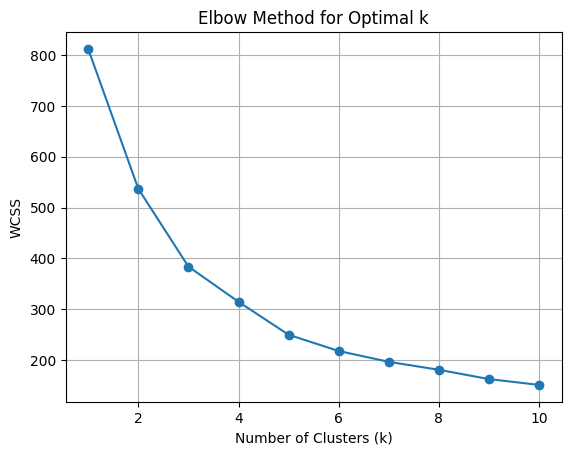

In [139]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

So we take number of cluster 3 for optimal output

## K mean clusterring using euclidean distance

In [140]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=36)

In [141]:
kmeans.fit(X)

C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=36)

In [142]:
cluster_labels = kmeans.labels_

In [143]:
dataset['Cluster'] = cluster_labels

In [144]:
cluster_centers = kmeans.cluster_centers_

### Visualize the clusters (for example, using Age and Spending Score)

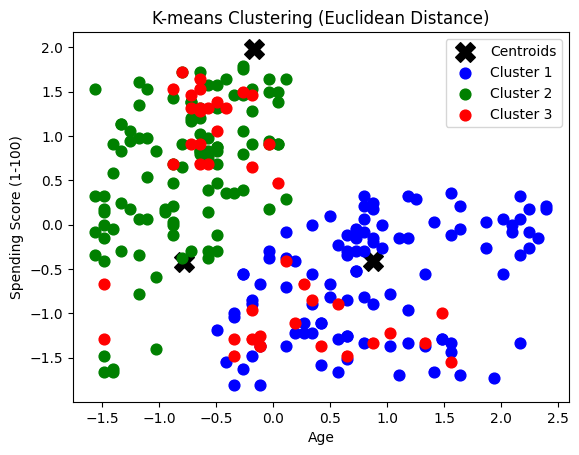

In [145]:
plt.scatter(dataset['Age'], dataset['Spending Score (1-100)'], c=cluster_labels, cmap='rainbow')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], marker='X', s=200, color='black', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering (Euclidean Distance)')
plt.scatter(X[cluster_labels == 0]['Age'], X[cluster_labels == 0]['Spending Score (1-100)'], s=60, c='blue', label='Cluster 1')
plt.scatter(X[cluster_labels == 1]['Age'], X[cluster_labels == 1]['Spending Score (1-100)'], s=60, c='green', label='Cluster 2')
plt.scatter(X[cluster_labels == 2]['Age'], X[cluster_labels == 2]['Spending Score (1-100)'], s=60, c='red', label='Cluster 3')
plt.legend()
plt.show()

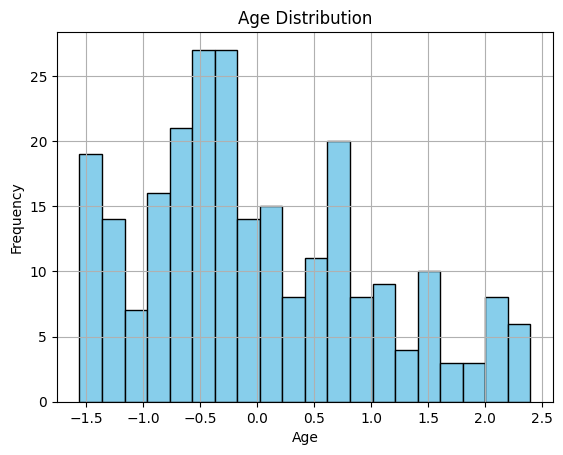

In [146]:
# Assuming dataset is your DataFrame containing 'Age'
plt.hist(dataset['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()


### evaluation

In [147]:
from sklearn.metrics import silhouette_score, pairwise_distances

# Compute the Silhouette Coefficient
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Coefficient: {silhouette_avg:.4f}")


Silhouette Coefficient: 0.3601


In [148]:
sse = kmeans.inertia_
print(f"Sum of Squared Errors (SSE): {sse:.2f}")

Sum of Squared Errors (SSE): 383.84


## K means Clusterring using Manhattan distance measure

In [149]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

In [151]:
kmeans.fit(X_scaled)

C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [152]:
dataset['Cluster'] = kmeans.labels_

### Visualize the clusters (you can customize this part)

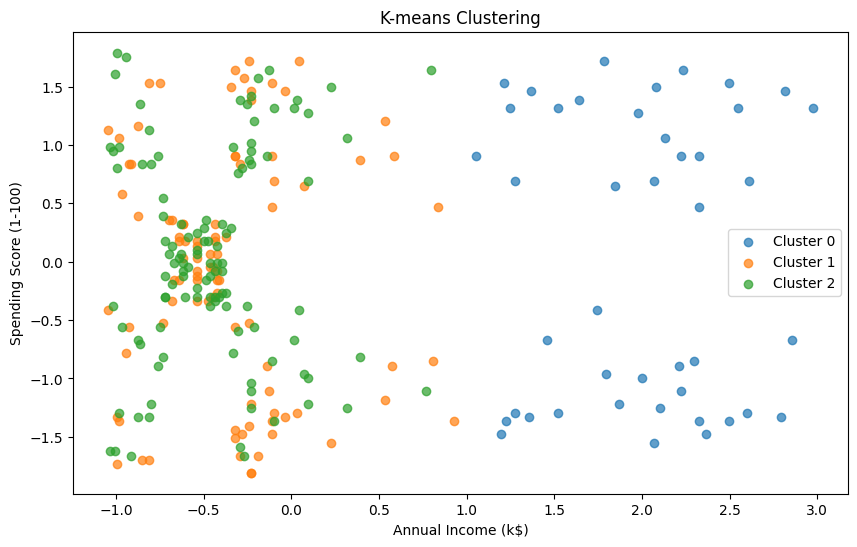

In [153]:

plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    plt.scatter(X_scaled[dataset['Cluster'] == cluster_num, 2], 
                X_scaled[dataset['Cluster'] == cluster_num, 3],
                label=f'Cluster {cluster_num}', alpha=0.7)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### evaluation

In [154]:
# Silhouette Coefficient
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_,)
print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

Silhouette Coefficient: 0.3155


In [155]:
# Sum of Squared Errors (SSE)
sse = kmeans.inertia_
print(f"Sum of Squared Errors (SSE): {sse:.2f}")

Sum of Squared Errors (SSE): 584.84


## K means Clusterring using squared euclidean distance measure

In [156]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [157]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

In [158]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', algorithm='auto', random_state=42)

In [159]:
kmeans.fit(X)

C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=3, random_state=42)

In [160]:
labels = kmeans.labels_

In [161]:
cluster_centers = kmeans.cluster_centers_

### Plot the data points and cluster centers

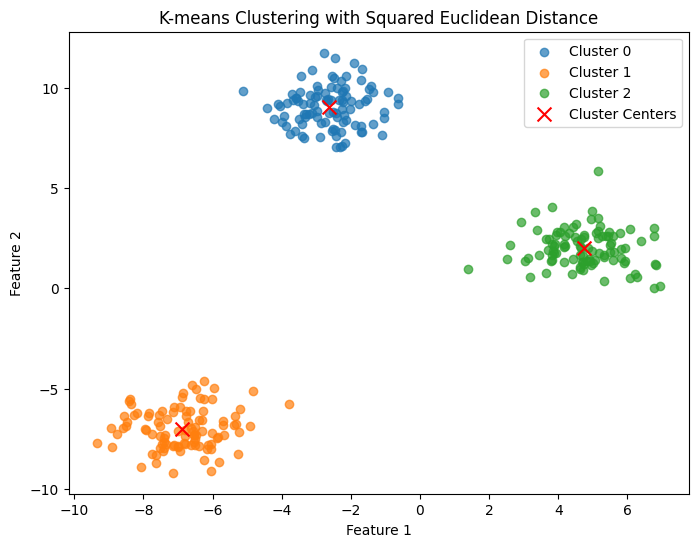

In [162]:
plt.figure(figsize=(8, 6))
for cluster_num in range(num_clusters):
    plt.scatter(X[labels == cluster_num, 0], X[labels == cluster_num, 1], label=f'Cluster {cluster_num}', alpha=0.7)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with Squared Euclidean Distance')
plt.legend()
plt.show()

### evaluation

In [163]:
# the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Average Silhouette Score: {silhouette_avg:.4f}")

Average Silhouette Score: 0.8480


In [164]:
# the SSD
distances = pairwise_distances(X, cluster_centers, metric='euclidean')
sse = np.sum(distances**2)
print(f"Sum of Squared Errors (SSE): {sse:.4f}")

Sum of Squared Errors (SSE): 120713.4880


## K means Clusterring using Cosine distance measure

In [165]:
from sklearn.preprocessing import normalize
X = np.random.randn(300, 2) 
X_normalized = normalize(X, axis=1)


In [166]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

In [167]:
kmeans.fit(X_normalized)

C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [168]:
labels = kmeans.labels_

In [169]:
cluster_centers = kmeans.cluster_centers_

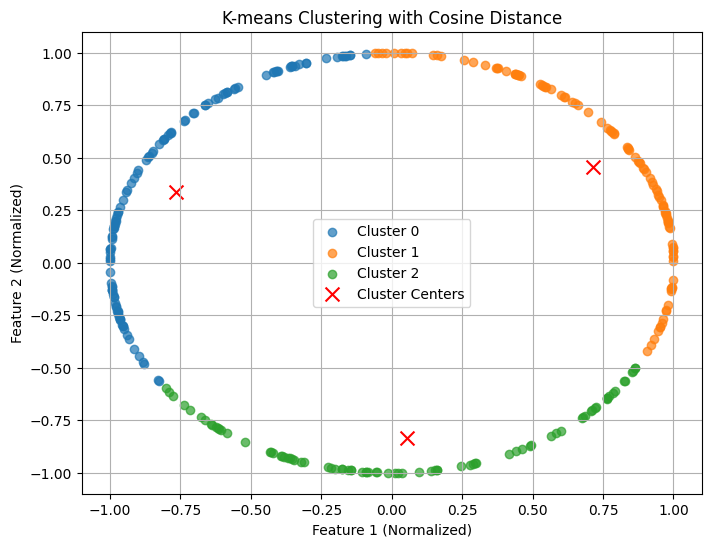

In [170]:
plt.figure(figsize=(8, 6))
for cluster_num in range(num_clusters):
    plt.scatter(X_normalized[labels == cluster_num, 0], X_normalized[labels == cluster_num, 1], label=f'Cluster {cluster_num}', alpha=0.7)

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='x', s=100, label='Cluster Centers')

plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('K-means Clustering with Cosine Distance')
plt.legend()
plt.grid(True)
plt.show()

Evaluation

In [171]:
silhouette_avg = silhouette_score(X_normalized, labels, metric='cosine')
print(f"Average Silhouette Score (Cosine Distance): {silhouette_avg:.4f}")

Average Silhouette Score (Cosine Distance): 0.6587


In [172]:
distances = pairwise_distances(X_normalized, cluster_centers, metric='cosine')
sse = np.sum(distances**2)
print(f"Sum of Squared Errors (SSE) (Cosine Distance): {sse:.4f}")

Sum of Squared Errors (SSE) (Cosine Distance): 1353.1288
